# IMPORTS

In [1]:
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns

# DATA LOADING

In [3]:
data = pd.read_csv('/content/drive/MyDrive/IndustrialCopperModelling/Copper_Set_Result.csv')

In [4]:
df = data.copy()

In [5]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


# EDA

In [6]:
df.shape

(181673, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [8]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [9]:
df.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [10]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

# DATA PREPROCESSING

In [11]:
df1 = df.copy()

In [12]:
df1['material_ref'].isnull().sum()

77919

In [13]:
df1.tail()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.0
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.0
181672,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC,20200702.0,406.6865384,30200854.0,25.0,Won,W,41.0,0.71,1240.0,0000000000000000000000000000000001005439,164141591,20200701.0,607.0


In [14]:
df1.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [15]:
# Convert column  from object to float with error handling
df1['item_date'] = pd.to_datetime(df1['item_date'], format='%Y%m%d', errors='coerce').dt.date
df1['delivery date'] = pd.to_datetime(df1['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df1['quantity tons'] = pd.to_numeric(df1['quantity tons'], errors='coerce')
df1['country'] = pd.to_numeric(df1['country'], errors='coerce')
df1['application'] = pd.to_numeric(df1['application'], errors='coerce')
df1['thickness'] = pd.to_numeric(df1['thickness'], errors='coerce')
df1['width'] = pd.to_numeric(df1['width'], errors='coerce')
df1['material_ref'] = df1['material_ref'].str.lstrip('0')
df1['product_ref'] = pd.to_numeric(df1['product_ref'], errors='coerce')
df1['selling_price'] = pd.to_numeric(df1['selling_price'], errors='coerce')


In [16]:
# Convert values starting with '00000' to NaN
df1['material_ref'] = np.where(df1['material_ref'].str.startswith('00000'), np.nan, df1['material_ref'])
df1['material_ref'].fillna('Unknown', inplace =True)
df1 = df1.dropna()

In [17]:
df1.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [18]:
df1.shape

(181631, 14)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181631 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181631 non-null  object 
 1   item_date      181631 non-null  object 
 2   quantity tons  181631 non-null  float64
 3   customer       181631 non-null  float64
 4   country        181631 non-null  float64
 5   status         181631 non-null  object 
 6   item type      181631 non-null  object 
 7   application    181631 non-null  float64
 8   thickness      181631 non-null  float64
 9   width          181631 non-null  float64
 10  material_ref   181631 non-null  object 
 11  product_ref    181631 non-null  int64  
 12  delivery date  181631 non-null  object 
 13  selling_price  181631 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


In [20]:
df1.skew()

quantity tons    424.641723
customer        -149.089203
country            0.753584
application        0.724324
thickness        303.471592
width              0.374845
product_ref        1.014983
selling_price    301.353247
dtype: float64

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181631 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181631 non-null  object 
 1   item_date      181631 non-null  object 
 2   quantity tons  181631 non-null  float64
 3   customer       181631 non-null  float64
 4   country        181631 non-null  float64
 5   status         181631 non-null  object 
 6   item type      181631 non-null  object 
 7   application    181631 non-null  float64
 8   thickness      181631 non-null  float64
 9   width          181631 non-null  float64
 10  material_ref   181631 non-null  object 
 11  product_ref    181631 non-null  int64  
 12  delivery date  181631 non-null  object 
 13  selling_price  181631 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


In [22]:
df1['selling_price'] = np.where(df1['selling_price'] <= 0, np.nan, df1['selling_price'])
df1['quantity tons'] = np.where(df1['quantity tons'] <= 0, np.nan, df1['quantity tons'])
df1['thickness'] = np.where(df1['thickness'] <= 0, np.nan, df1['thickness'])
df1['customer'] = np.where(df1['customer'] <= 0, np.nan, df1['customer'])
df1['width'] = np.where(df1['width'] <= 0, np.nan, df1['width'])
df1['application'] = np.where(df1['width'] <= 0, np.nan, df1['width'])
df1['country'] = np.where(df1['width'] <= 0, np.nan, df1['width'])

# The purpose of these lines is to handle values that are less than or equal to 0 in the specified columns by replacing them with NaN values.

In [23]:
df1.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [24]:
df1 = df1.dropna()

In [25]:
df1.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [26]:
df1.shape

(181620, 14)

quantity tons       Axes(0.125,0.53;0.133621x0.35)
customer         Axes(0.285345,0.53;0.133621x0.35)
country           Axes(0.44569,0.53;0.133621x0.35)
application      Axes(0.606034,0.53;0.133621x0.35)
thickness        Axes(0.766379,0.53;0.133621x0.35)
width               Axes(0.125,0.11;0.133621x0.35)
product_ref      Axes(0.285345,0.11;0.133621x0.35)
selling_price     Axes(0.44569,0.11;0.133621x0.35)
dtype: object

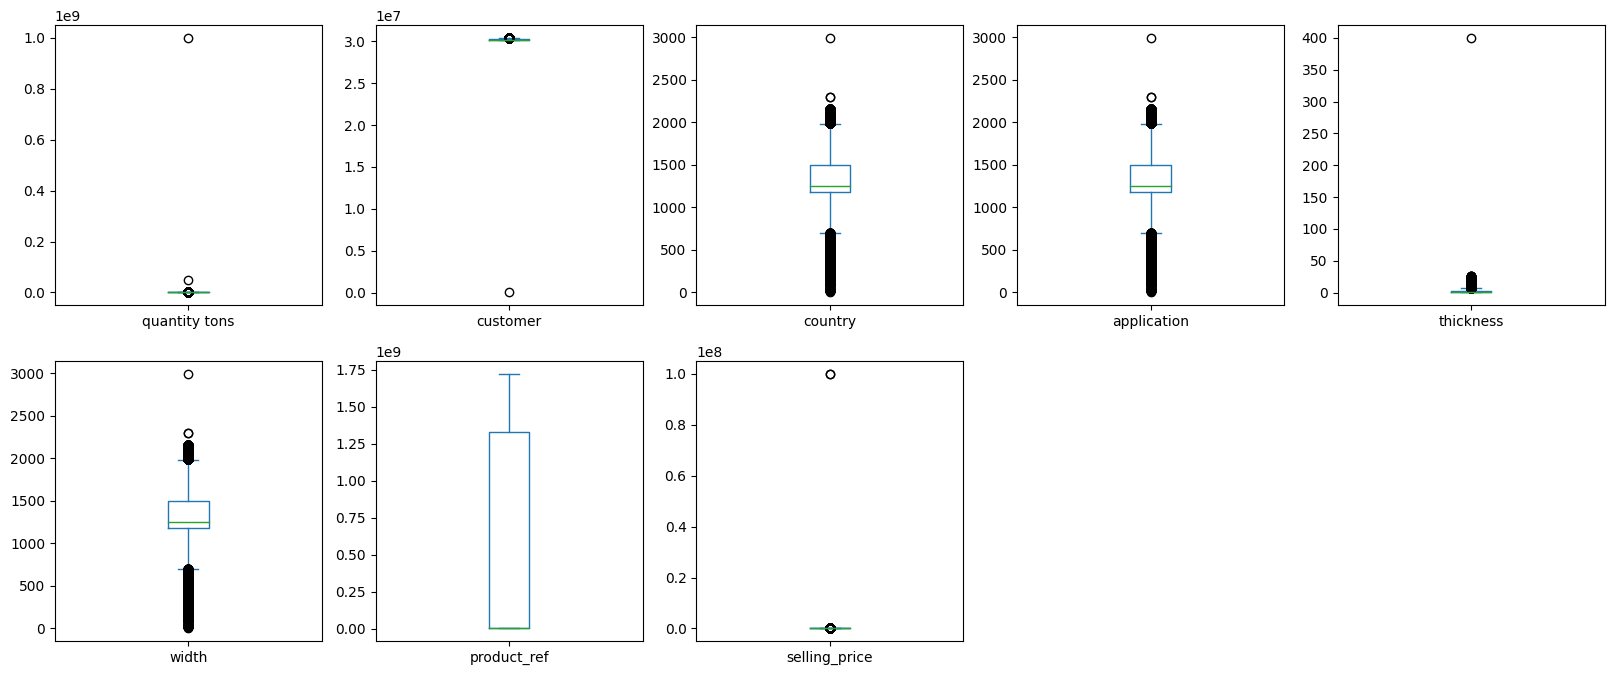

In [27]:
df1.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,8))

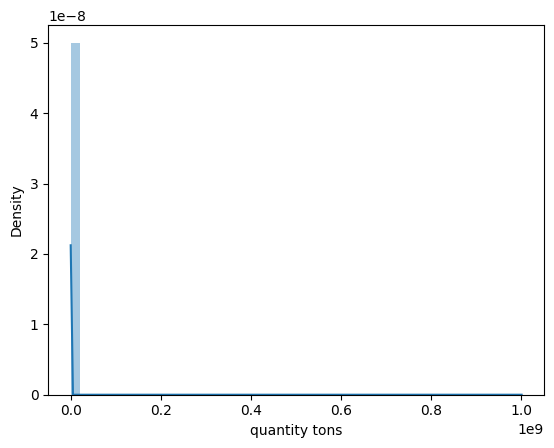

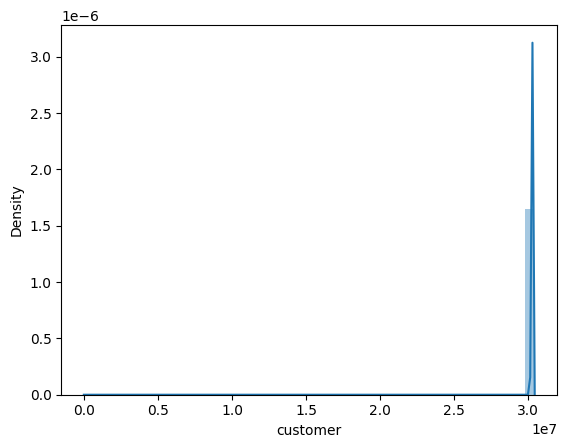

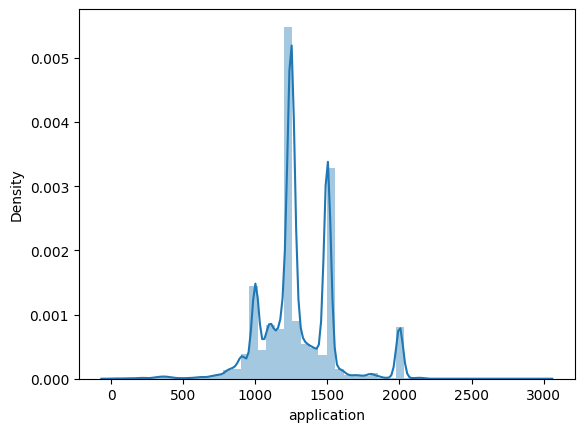

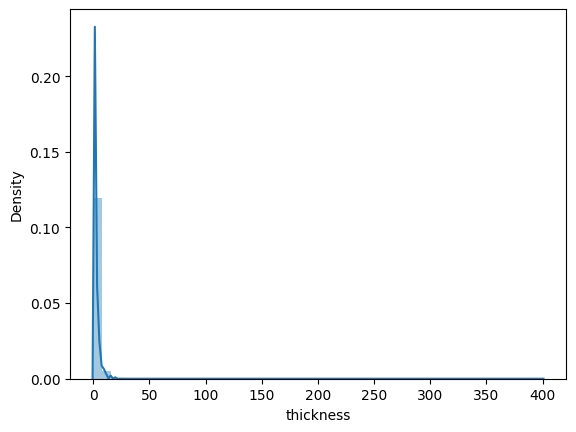

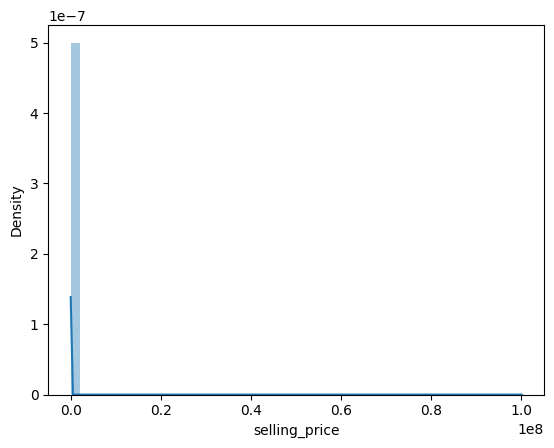

In [28]:
sns.distplot(df1['quantity tons'])
plt.show()
sns.distplot(df1['customer'])
plt.show()
sns.distplot(df1['application'])
plt.show()
sns.distplot(df1['thickness'])
plt.show()
sns.distplot(df1['selling_price'])
plt.show()

In [29]:
df2 = df1.copy()

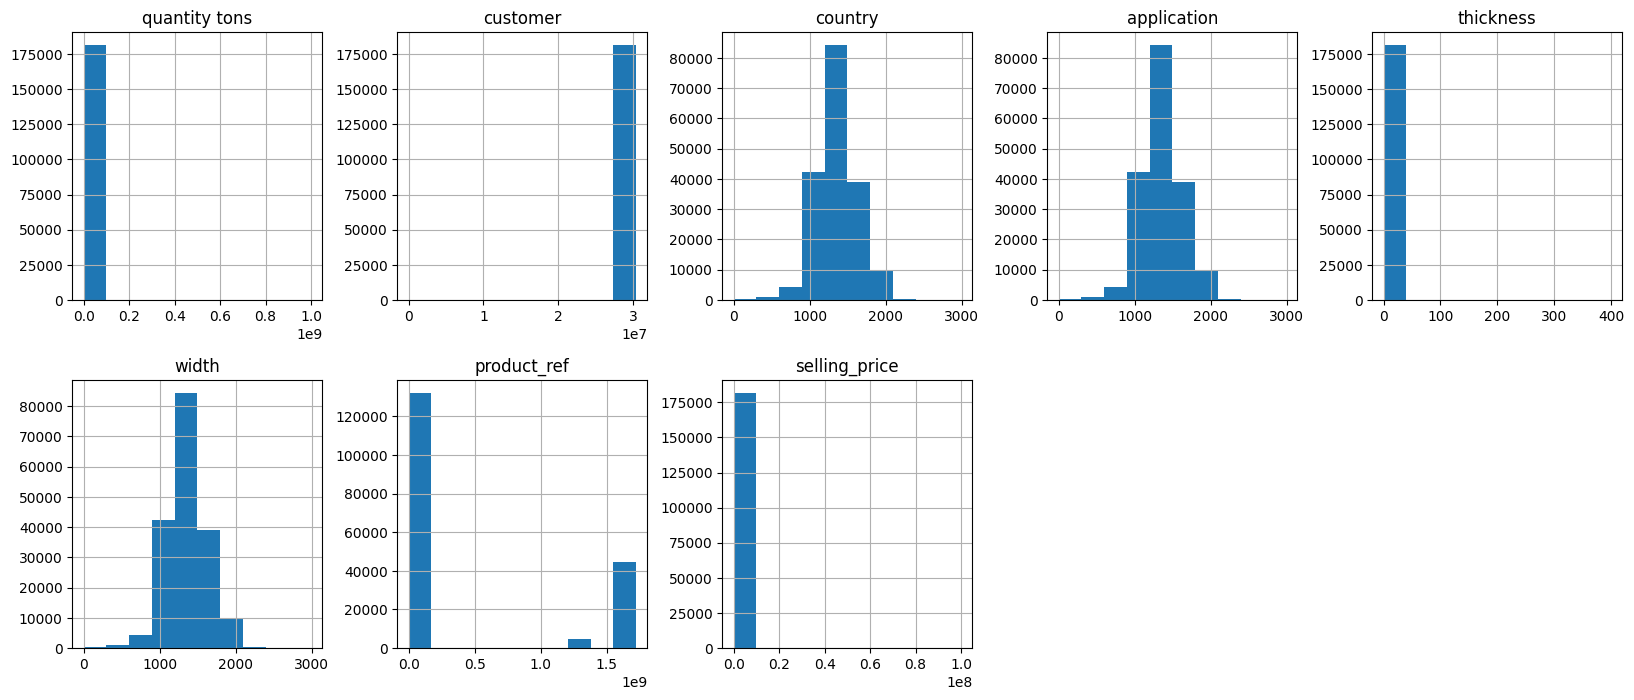

In [30]:
df2.hist(layout=(2,5),figsize=(20,8))
plt.show()

In [31]:
df2.nunique()

id               181620
item_date           250
quantity tons    181620
customer           1167
country            1386
status                9
item type             7
application        1386
thickness           593
width              1386
material_ref      16561
product_ref          33
delivery date        26
selling_price      9789
dtype: int64

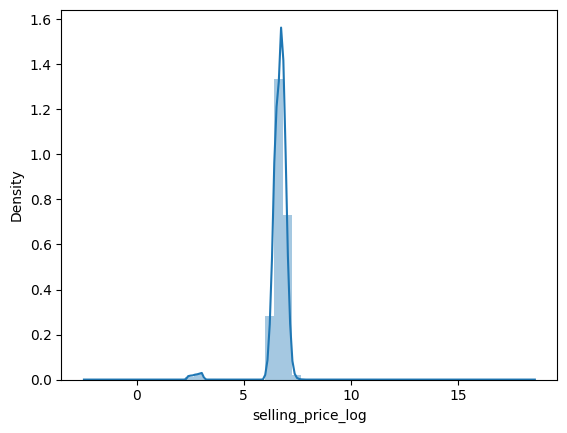

Skewness: -5.342799354887634


In [32]:
# offset = 450

# df2['selling_price_log'] = np.log1p(df2['selling_price']+ offset)

df2['selling_price_log'] = np.log(df2['selling_price'])
sns.distplot(df2['selling_price_log'])
plt.show()
print('Skewness:', df2['selling_price_log'].skew())

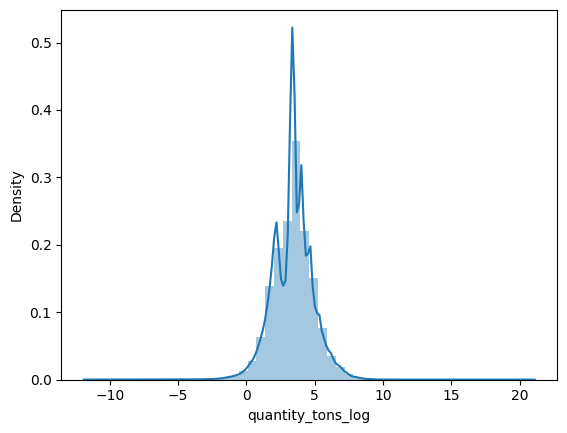

Skewness: -0.06876995286651721


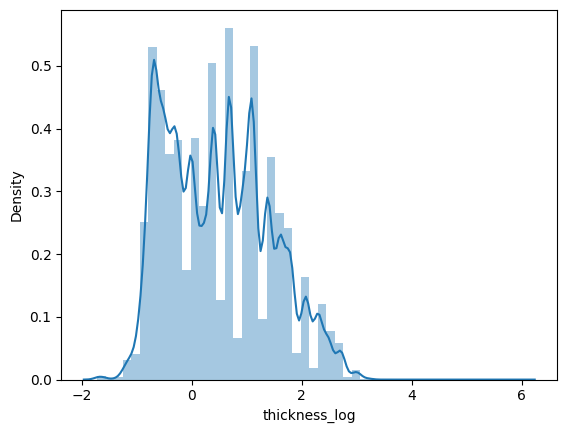

Skewness: 0.3491253164528563


In [33]:
# offset1 = 1


# df2['quantity_tons_log'] = np.log1p(df2['quantity tons']+ offset1)

df2['quantity_tons_log'] = np.log(df2['quantity tons'])
sns.distplot(df2['quantity_tons_log'])
plt.show()
print('Skewness:', df2['quantity_tons_log'].skew())

# offset2 = 1
df2['thickness_log'] = np.log(df2['thickness'])
sns.distplot(df2['thickness_log'])
plt.show()
print('Skewness:', df2['thickness_log'].skew())

In [34]:
df2.skew().sort_values()

customer            -149.087141
selling_price_log     -5.342799
quantity_tons_log     -0.068770
thickness_log          0.349125
country                0.374812
application            0.374812
width                  0.374812
product_ref            1.015044
thickness             15.302912
selling_price        301.344122
quantity tons        424.628864
dtype: float64

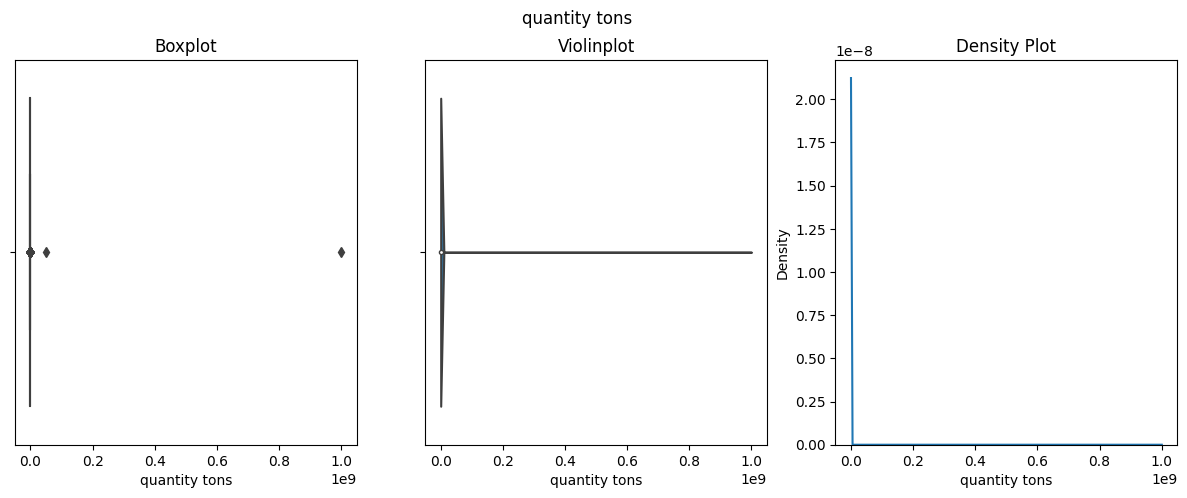

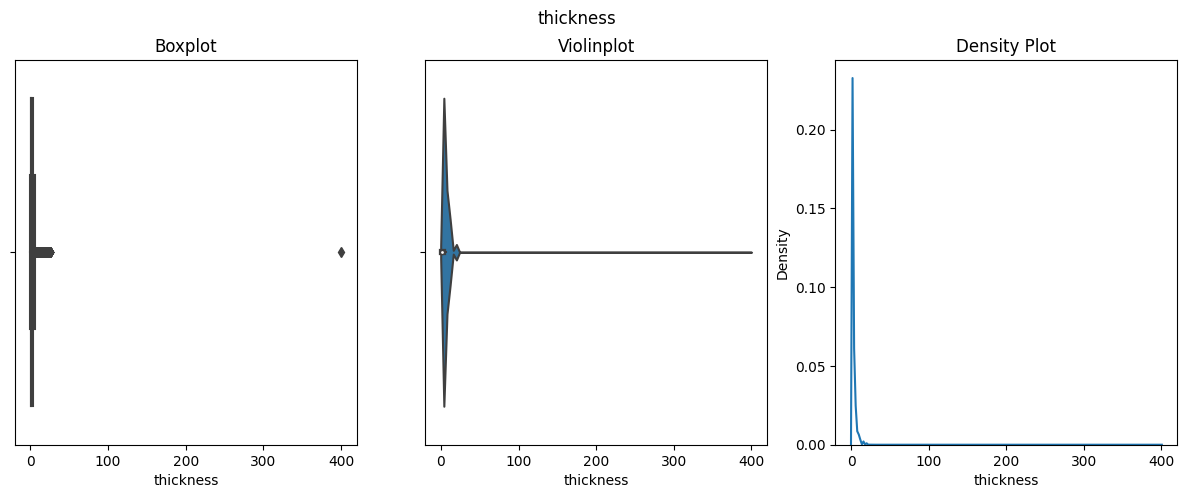

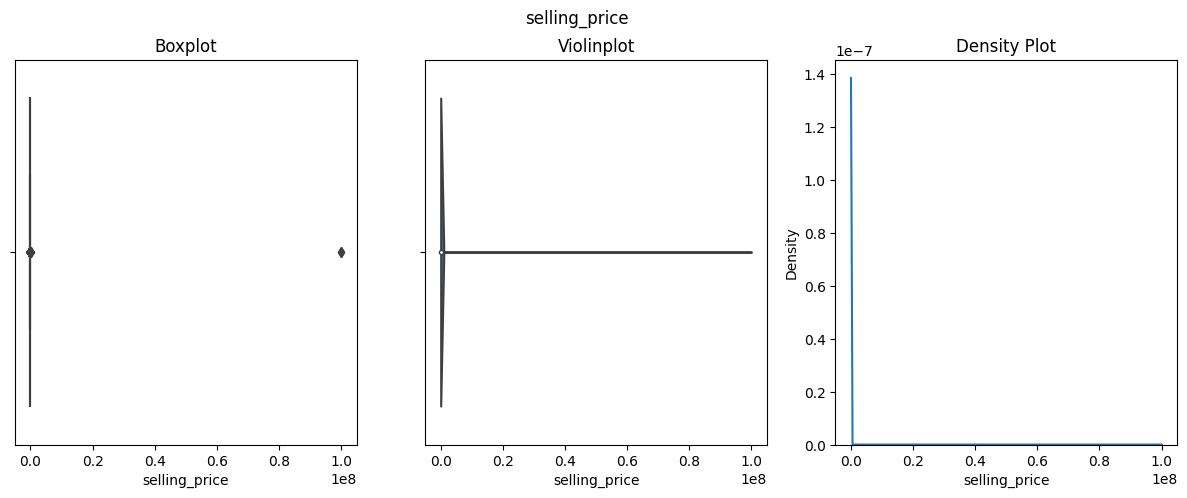

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Select the columns from the DataFrame
columns = ['quantity tons', 'thickness', 'selling_price']

for col in columns:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(col)

    # Boxplot
    sns.boxplot(x=df2[col], ax=ax[0])
    ax[0].set_title('Boxplot')

    # Violinplot
    sns.violinplot(x=df2[col], ax=ax[1])
    ax[1].set_title('Violinplot')

    # Density Plot
    sns.kdeplot(df2[col], ax=ax[2])
    ax[2].set_title('Density Plot')

    plt.show()

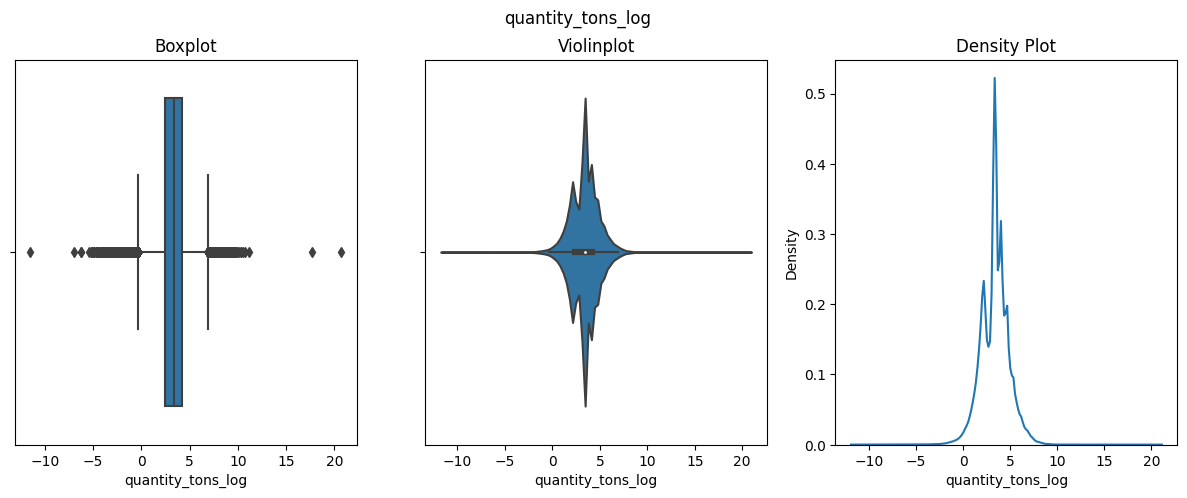

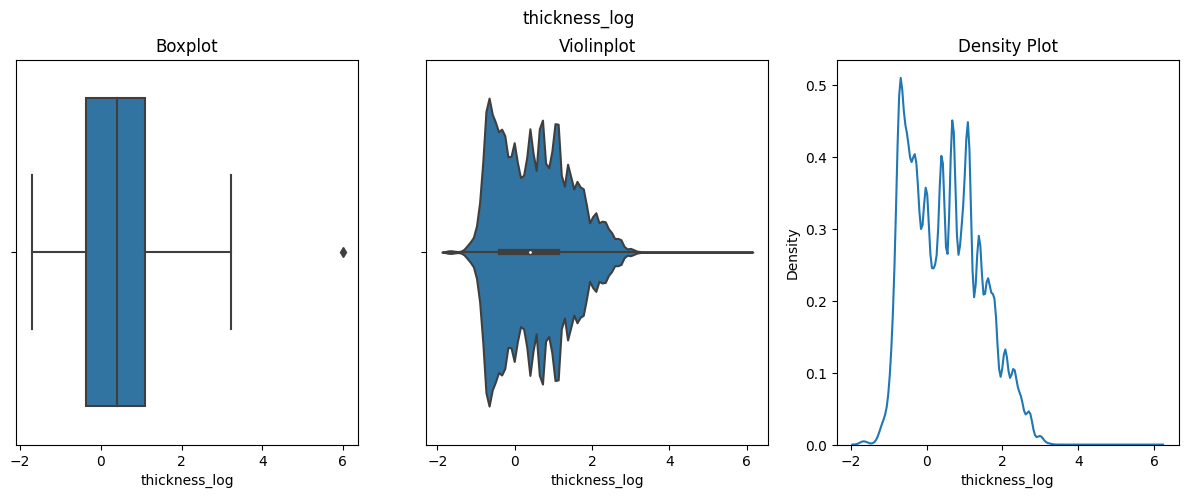

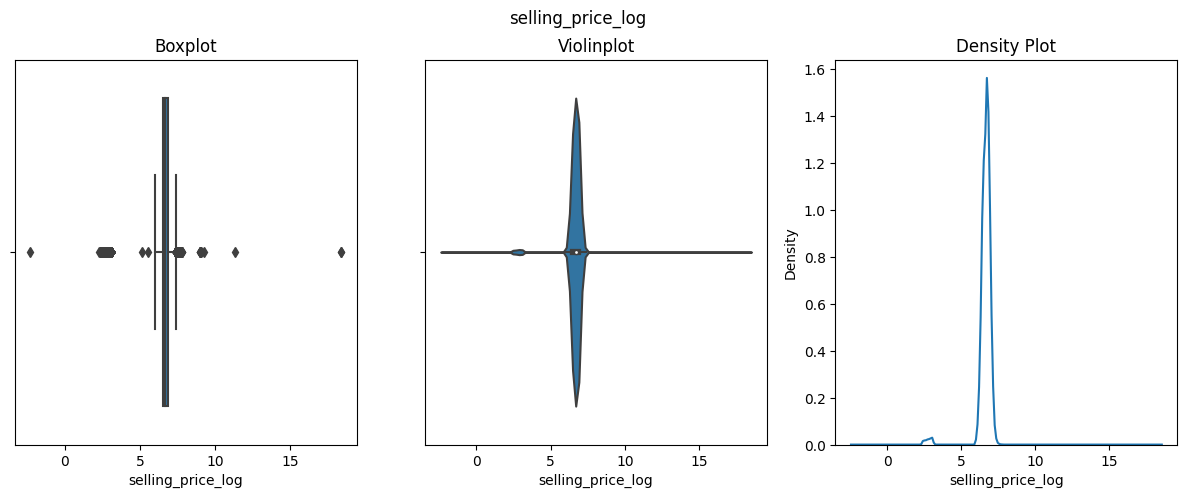

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Select the columns from the DataFrame
columns = ['quantity_tons_log', 'thickness_log', 'selling_price_log']

for col in columns:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(col)

    # Boxplot
    sns.boxplot(x=df2[col], ax=ax[0])
    ax[0].set_title('Boxplot')

    # Violinplot
    sns.violinplot(x=df2[col], ax=ax[1])
    ax[1].set_title('Violinplot')

    # Density Plot
    sns.kdeplot(df2[col], ax=ax[2])
    ax[2].set_title('Density Plot')

    plt.show()

In [37]:
df2.nunique()

id                   181620
item_date               250
quantity tons        181620
customer               1167
country                1386
status                    9
item type                 7
application            1386
thickness               593
width                  1386
material_ref          16561
product_ref              33
delivery date            26
selling_price          9789
selling_price_log      9789
quantity_tons_log    181620
thickness_log           593
dtype: int64

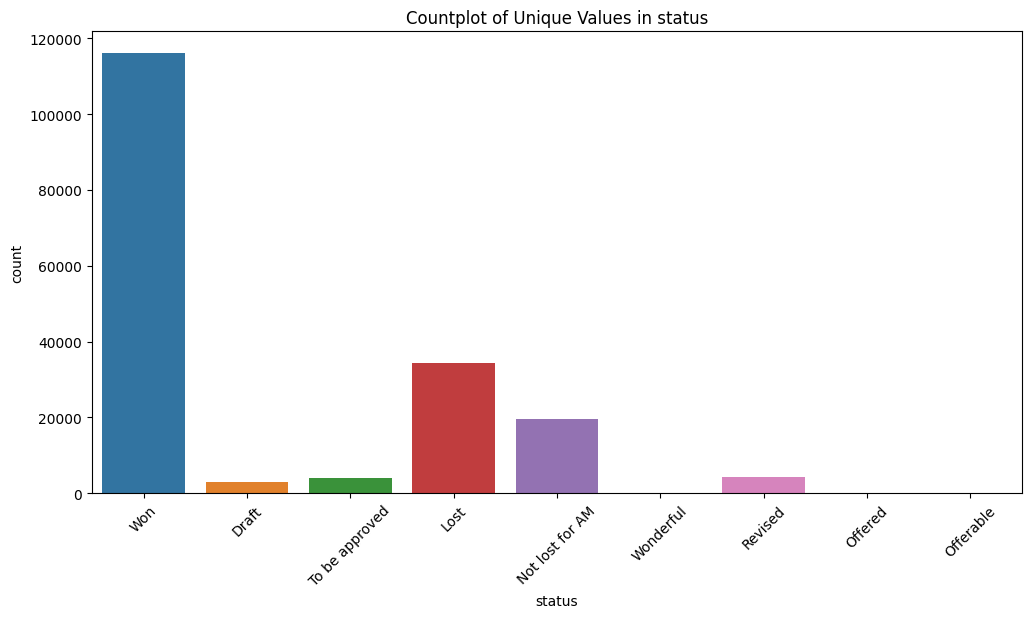

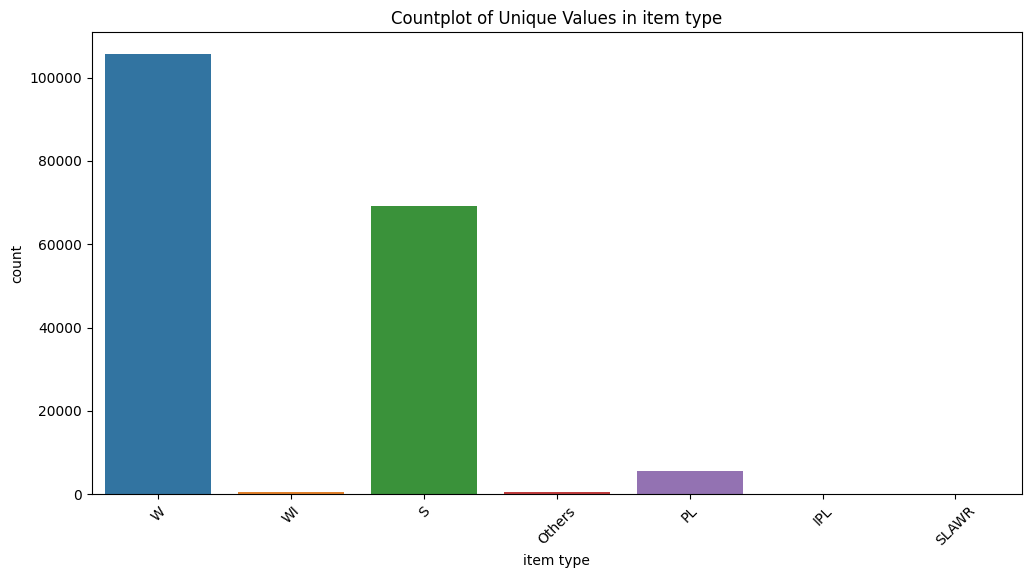

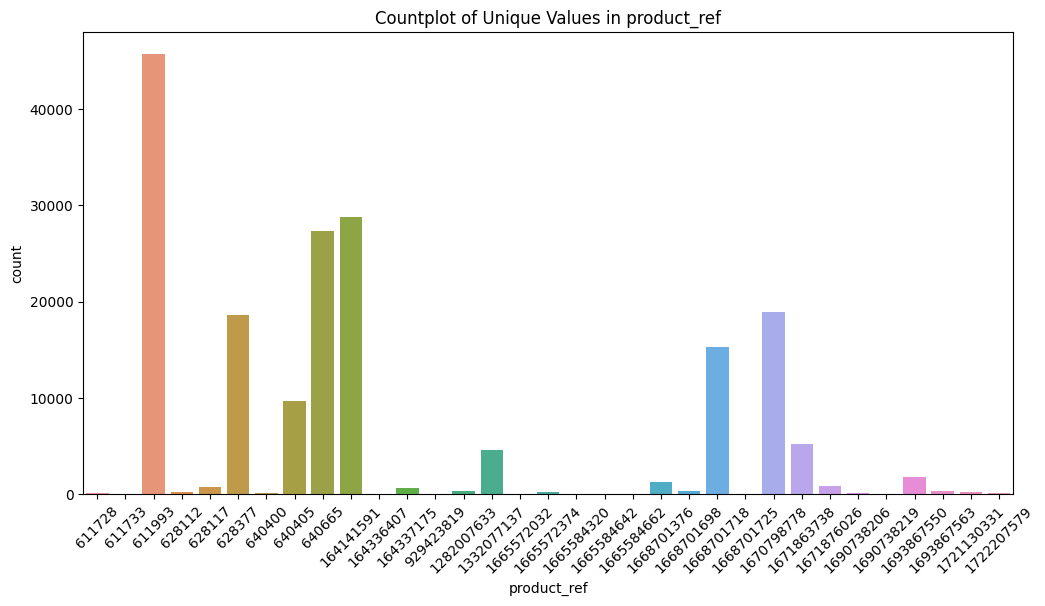

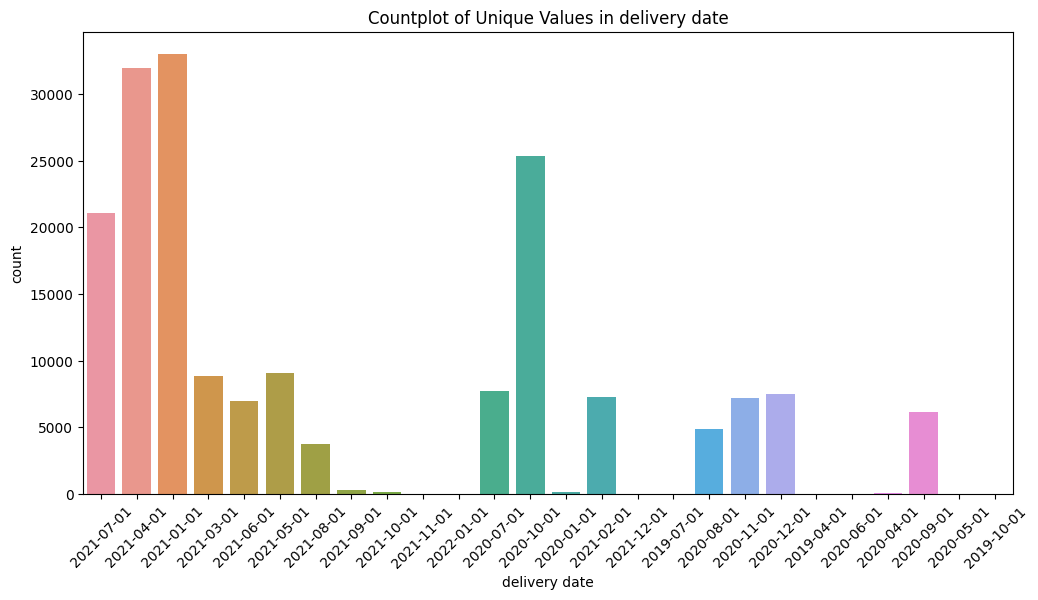

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df2.columns:
    unique_values = df2[column].nunique()
    if unique_values < 35:
        plt.figure(figsize=(12, 6))
        sns.countplot(x=df2[column])
        plt.title(f"Countplot of Unique Values in {column}")
        plt.xticks(rotation=45)
        plt.show()


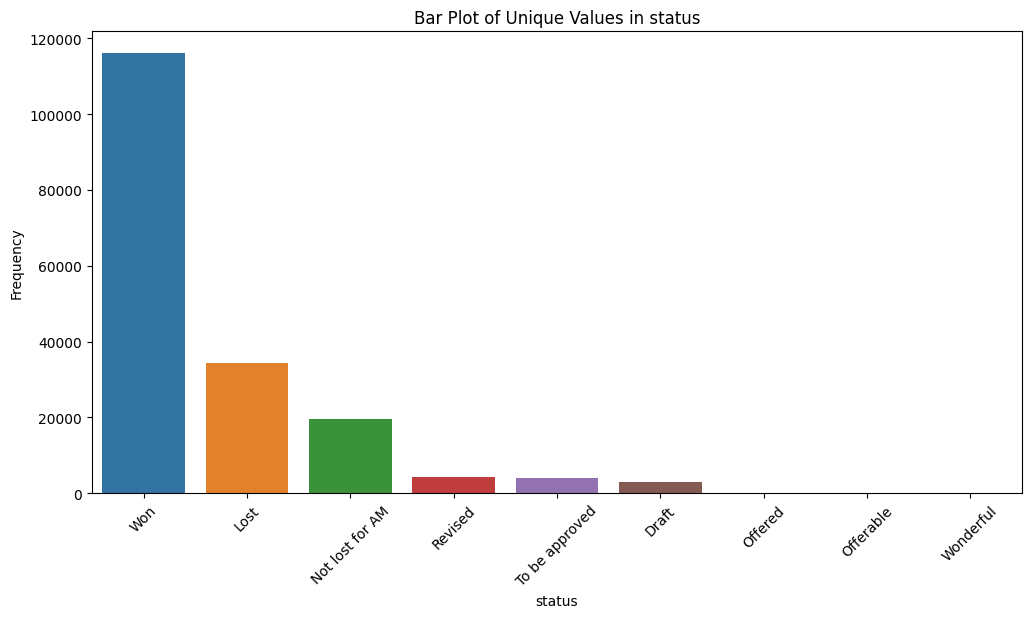

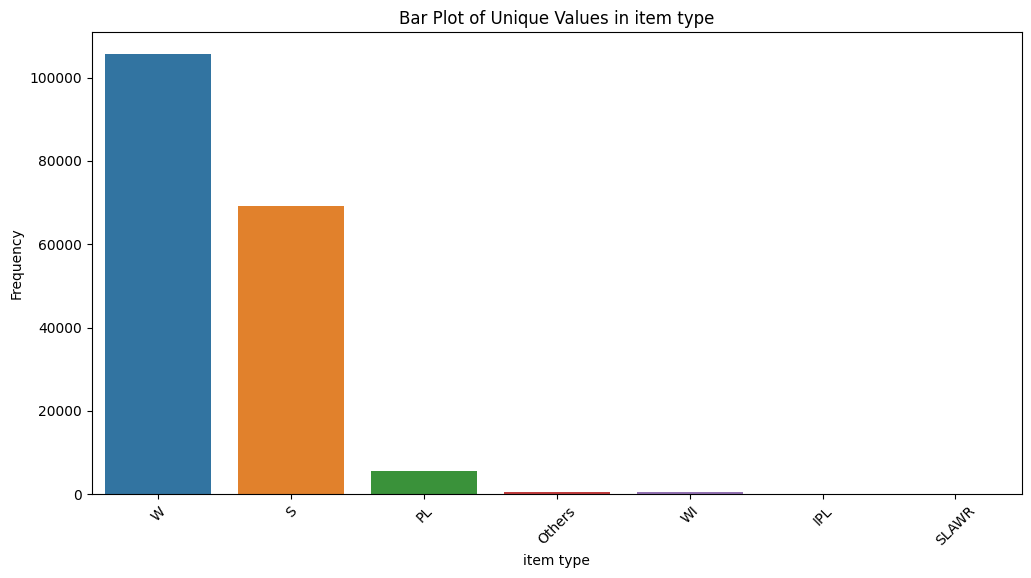

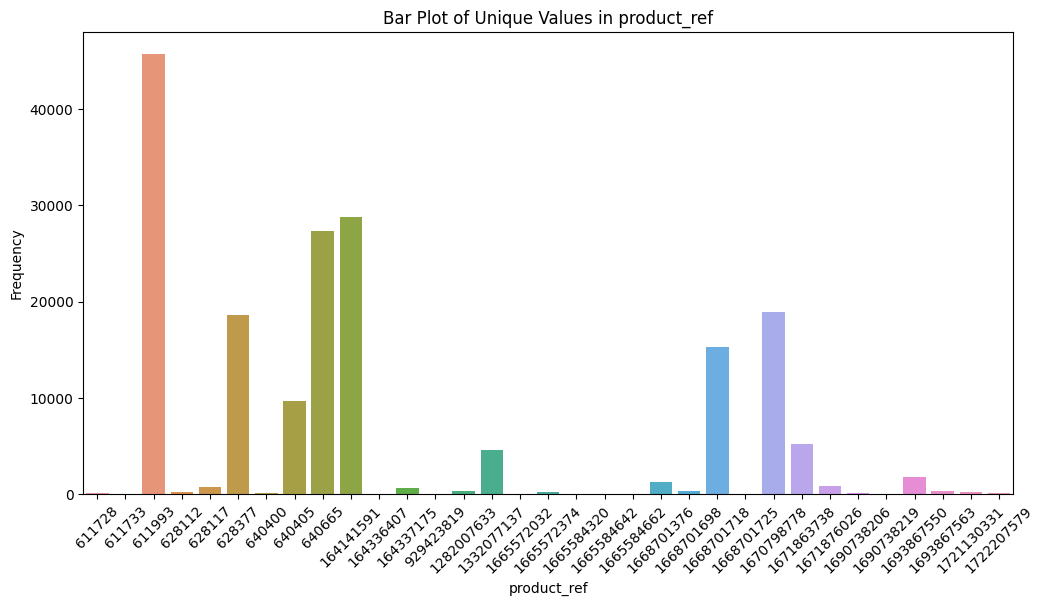

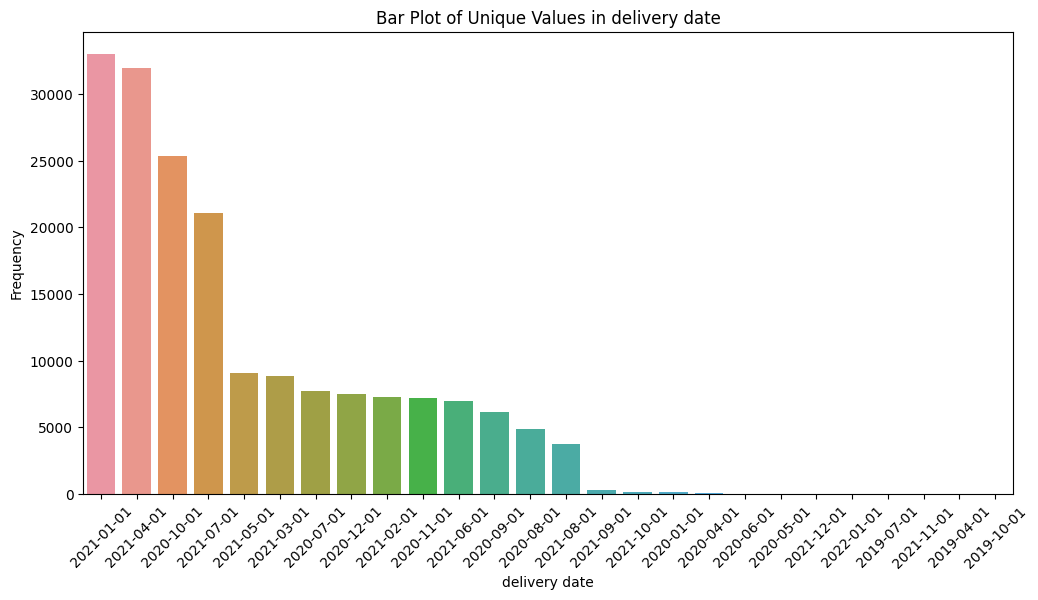

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df.columns:
    unique_values = df2[column].nunique()
    if unique_values < 35:
        value_counts = df2[column].value_counts()
        plt.figure(figsize=(12, 6))
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f"Bar Plot of Unique Values in {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.show()


In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181620 entries, 0 to 181672
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 181620 non-null  object 
 1   item_date          181620 non-null  object 
 2   quantity tons      181620 non-null  float64
 3   customer           181620 non-null  float64
 4   country            181620 non-null  float64
 5   status             181620 non-null  object 
 6   item type          181620 non-null  object 
 7   application        181620 non-null  float64
 8   thickness          181620 non-null  float64
 9   width              181620 non-null  float64
 10  material_ref       181620 non-null  object 
 11  product_ref        181620 non-null  int64  
 12  delivery date      181620 non-null  object 
 13  selling_price      181620 non-null  float64
 14  selling_price_log  181620 non-null  float64
 15  quantity_tons_log  181620 non-null  float64
 16  th

<Axes: >

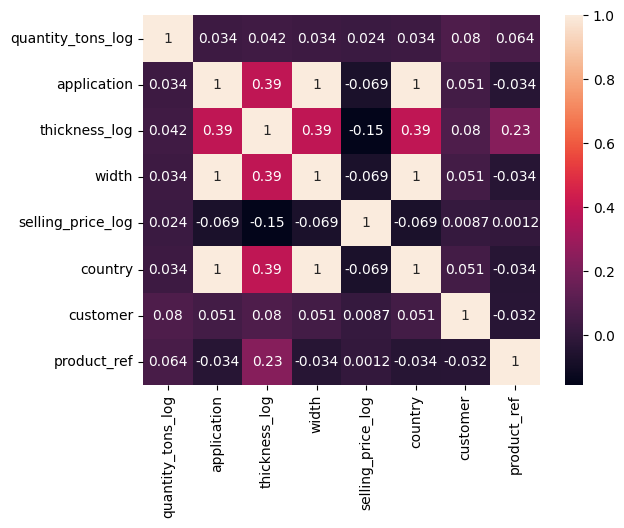

In [41]:
h =df2[['quantity_tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()
sns.heatmap(h, annot = True)

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
from sklearn.model_selection import train_test_split


In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [45]:
X=df2[['quantity_tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
Y=df2['selling_price_log']

In [46]:
X.shape

(181620, 9)

In [47]:
Y.shape

(181620,)

# ENCODING

In [48]:
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()
# independent features after encoding
X = np.concatenate((X[['quantity_tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)

In [49]:
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# SCALING

In [50]:
#scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# DECISION TREE REGRESSION

In [51]:
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean squared error: 0.025810466006549095
R-squared: 0.919555317646947


In [52]:
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [649.29068451]


In [53]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)


### **CLASSIFICATION**

# **DECISION TREE CLASSIFIER**

In [54]:
df2.shape

(181620, 17)

In [55]:
df_dt = df2[df2['status'].isin(['Won','Lost'])]
df_dt.shape

(150427, 17)

In [56]:
## X & y
X= df_dt[['quantity_tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref']]
Y = df_dt['status']

In [57]:
X.shape

(150427, 9)

In [58]:
Y.shape

(150427,)

In [59]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
be = LabelBinarizer()
be.fit(Y)
y = be.fit_transform(Y)
# independent features after encoding
X = np.concatenate((X[['quantity_tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe), axis=1)

In [60]:
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [61]:
#scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import  classification_report, roc_curve, auc
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

In [63]:
#model
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.903443462075384
Confusion Matrix:
[[ 5545  1477]
 [ 1428 21636]]


Classification Report:
              precision    recall  f1-score   support

        Lost       0.80      0.79      0.79      7022
         Won       0.94      0.94      0.94     23064

    accuracy                           0.90     30086
   macro avg       0.87      0.86      0.86     30086
weighted avg       0.90      0.90      0.90     30086



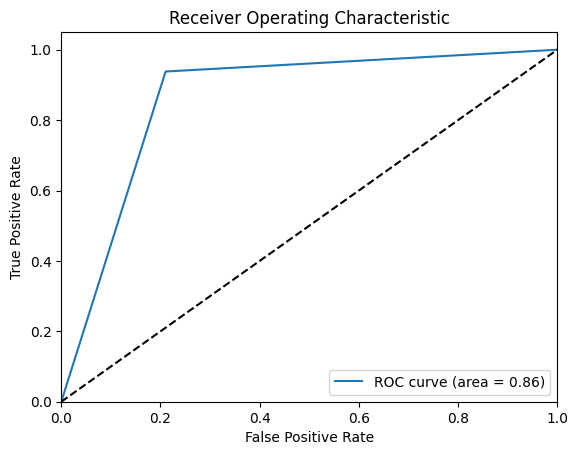

In [64]:


# Convert labels to numeric format
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC curve and AUC
roc_auc = roc_auc_score(y_test_encoded, y_pred_encoded)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_encoded)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [65]:
#predicting for new sample
new_sample = np.array([[np.log(630), np.log(986), 41, np.log(2),1200,25.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Lost


In [66]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)